In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
target=df.iloc[:,0]
df.drop('label',axis=1,inplace=True)

In [7]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test=pd.read_csv('test.csv')
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
target.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
import os
import cv2
import tensorflow as tf

In [10]:
x_train=df
y_train=target

In [12]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [19]:
x_train=x_train.values.reshape(-1,28,28,1)
x_test=x_test.values.reshape(-1,28,28,1)

In [13]:
model=tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 6s 3ms/step - loss: 0.1310 - accuracy: 0.9678
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1125 - accuracy: 0.9721
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0984 - accuracy: 0.9752
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0879 - accuracy: 0.9777
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0782 - accuracy: 0.9805
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0750 - accuracy: 0.9810
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0691 - accuracy: 0.9824
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0594 - accuracy: 0.9859
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0576 - accuracy: 0.9857
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.053

In [23]:
result=model.predict(x_test)

875/875 [==============================] - 2s 2ms/step


In [24]:
result.shape

(28000, 10)

In [36]:
li=[]
for i in range(28000):
    li.append(np.argmax(result[i]))
res=np.array(li)

In [34]:
result[0]

array([2.1474365e-05, 1.0074547e-03, 9.8216784e-01, 4.3312280e-04,
       1.4309591e-02, 2.1037014e-05, 2.6735528e-05, 1.3237231e-03,
       1.7335937e-04, 5.1577401e-04], dtype=float32)

In [35]:
np.argmax(result[0])

2

In [37]:
for i in range(15):
    print(res[i])

2
0
9
4
3
7
0
3
0
3
5
7
4
0
4


In [38]:
temp_df=pd.read_csv('sample_submission.csv')

In [39]:
temp=pd.DataFrame(res.reshape(-1,1))

In [40]:
final=pd.concat([temp_df['ImageId'],temp],axis=1)

In [41]:
final.head()

,ImageId,0
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [42]:
final.columns=['ImageId','Label']

In [43]:
final.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [44]:
final.to_csv('sample_submission.csv',index=False)

In [45]:
# We have got an accuracy of 95%

1/1 [==============================] - 0s 171ms/step
This digit is probably a 2


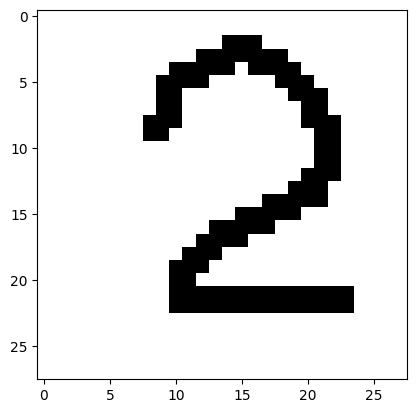

1/1 [==============================] - 0s 31ms/step
This digit is probably a 5


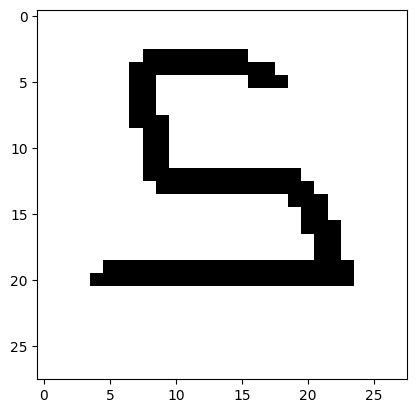

1/1 [==============================] - 0s 27ms/step
This digit is probably a 2


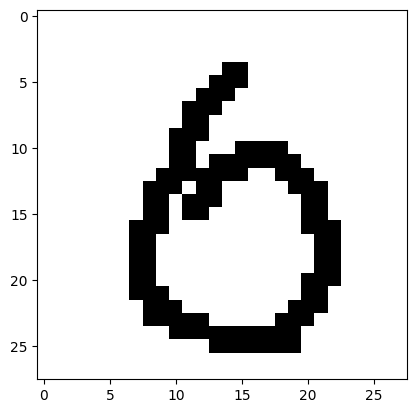

1/1 [==============================] - 0s 31ms/step
This digit is probably a 3


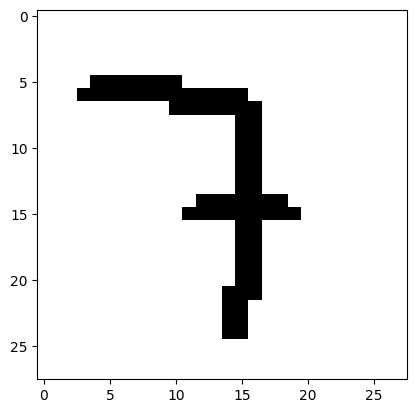

1/1 [==============================] - 0s 32ms/step
This digit is probably a 0


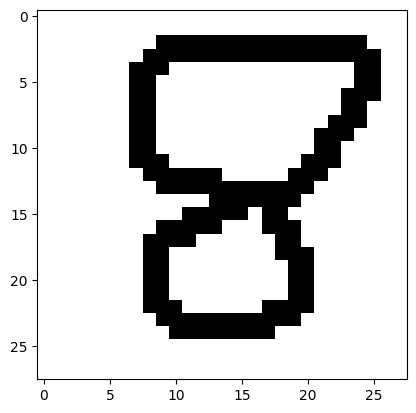

1/1 [==============================] - 0s 26ms/step
This digit is probably a 0


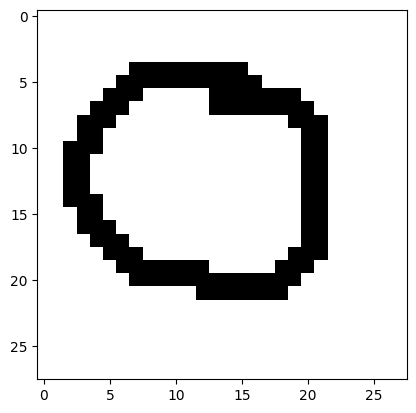

1/1 [==============================] - 0s 30ms/step
This digit is probably a 1


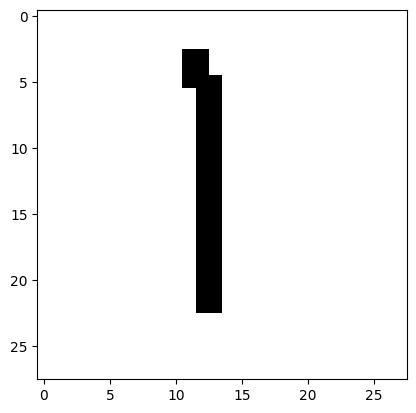

1/1 [==============================] - 0s 27ms/step
This digit is probably a 3


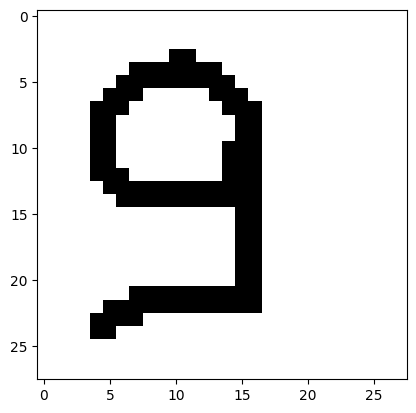

1/1 [==============================] - 0s 28ms/step
This digit is probably a 0


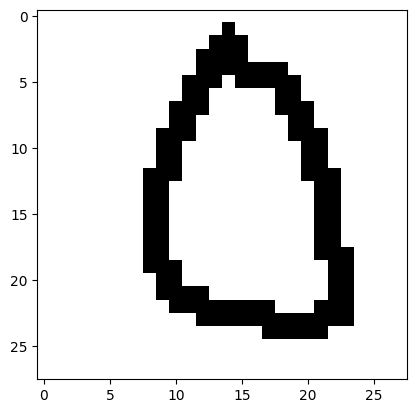

1/1 [==============================] - 0s 28ms/step
This digit is probably a 3


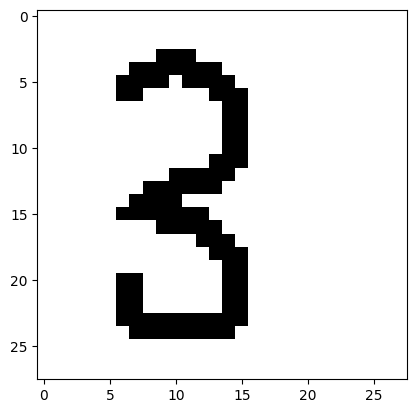

1/1 [==============================] - 0s 24ms/step
This digit is probably a 1


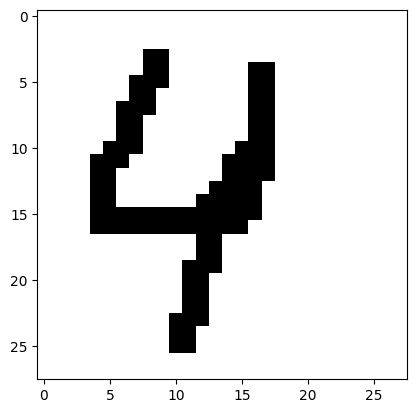

1/1 [==============================] - 0s 25ms/step
This digit is probably a 3


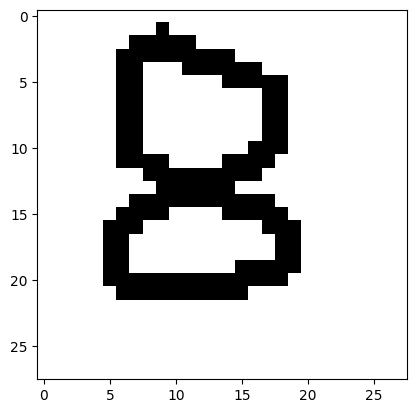

1/1 [==============================] - 0s 30ms/step
This digit is probably a 1


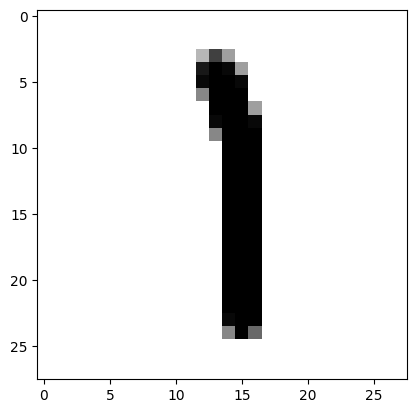

1/1 [==============================] - 0s 29ms/step
This digit is probably a 0


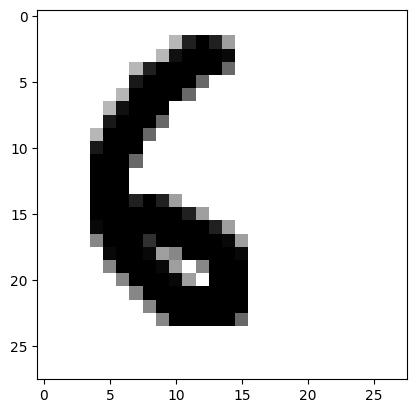

1/1 [==============================] - 0s 24ms/step
This digit is probably a 5


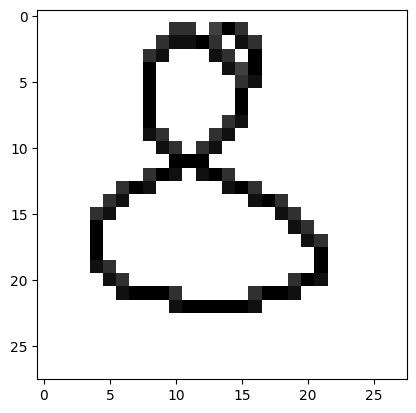

1/1 [==============================] - 0s 27ms/step
This digit is probably a 3


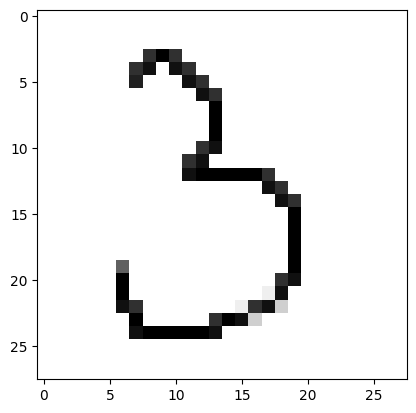

1/1 [==============================] - 0s 26ms/step
This digit is probably a 5


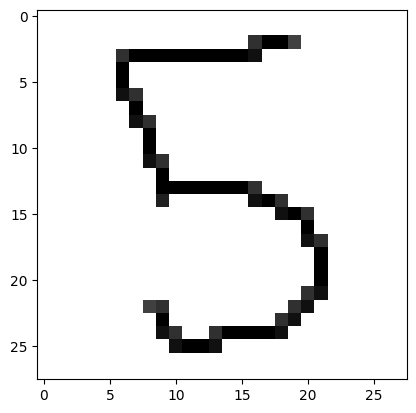

1/1 [==============================] - 0s 28ms/step
This digit is probably a 2


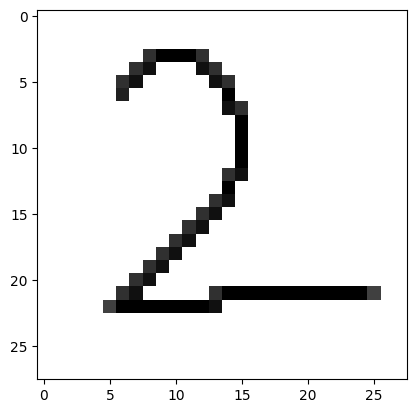

1/1 [==============================] - 0s 24ms/step
This digit is probably a 3


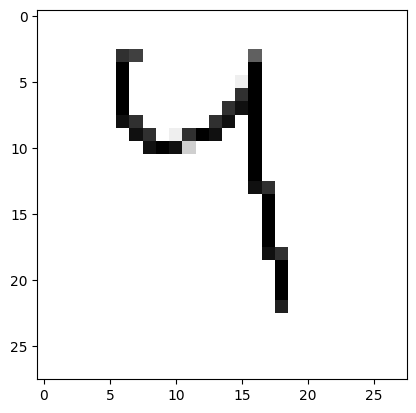

1/1 [==============================] - 0s 30ms/step
This digit is probably a 3


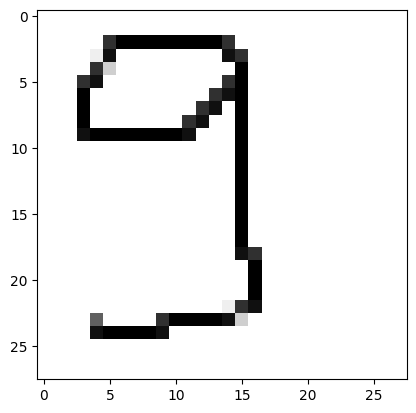

In [50]:
image_num=1
while os.path.isfile(f"digits/digit{image_num}.png"):
    try:
        img=cv2.imread(f"digits/digit{image_num}.png")[:,:,0]
        img=np.invert(np.array([img]))
        img=img/float(255)
        prediction=model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_num+=1